EARTHQUAKE DAMAGE PREDICTION

PROBLEM STATEMENT 

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

Task 3:- Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data loading
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

#Merge them on 'building_id'
df = pd.merge(train_values, train_labels, on='building_id')


In [3]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


EDA

In [108]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

NULL VALUES,DUPLICATES AND INCONSISTENT DATA

In [7]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [110]:
#no features contains any null values

In [7]:
df.duplicated().sum()   #there are no any duplicate values

np.int64(0)

In [8]:
df.value_counts().sum()

np.int64(260601)

In [113]:
for col in df.columns:
  print(f'/n value counts of: {col} ')
  print(df[col].value_counts().sort_index())

/n value counts of: building_id 
building_id
4          1
8          1
12         1
16         1
17         1
          ..
1052921    1
1052926    1
1052929    1
1052931    1
1052934    1
Name: count, Length: 260601, dtype: int64
/n value counts of: geo_level_1_id 
geo_level_1_id
0      4011
1      2701
2       931
3      7540
4     14568
5      2690
6     24381
7     18994
8     19080
9      3958
10    22079
11     8220
12     3194
13     9608
14     1714
15     2320
16     4332
17    21813
18     3189
19      372
20    17216
21    14889
22     6252
23     1121
24     1310
25     5624
26    22615
27    12532
28      265
29      396
30     2686
Name: count, dtype: int64
/n value counts of: geo_level_2_id 
geo_level_2_id
0        38
1       204
3        77
4       315
5        25
       ... 
1423      3
1424      7
1425    466
1426    286
1427      6
Name: count, Length: 1414, dtype: int64
/n value counts of: geo_level_3_id 
geo_level_3_id
0         2
1         6
3         9
5        14

In [114]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} ➜ Unique values: {df[col].unique()}")


land_surface_condition ➜ Unique values: ['t' 'o' 'n']
foundation_type ➜ Unique values: ['r' 'w' 'i' 'u' 'h']
roof_type ➜ Unique values: ['n' 'q' 'x']
ground_floor_type ➜ Unique values: ['f' 'x' 'v' 'z' 'm']
other_floor_type ➜ Unique values: ['q' 'x' 'j' 's']
position ➜ Unique values: ['t' 's' 'j' 'o']
plan_configuration ➜ Unique values: ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
legal_ownership_status ➜ Unique values: ['v' 'a' 'r' 'w']


In [115]:
# there is no inconsistent data

DATA IMBALANCE 

In [7]:
df['damage_grade'].value_counts().sort_index()

damage_grade
1     25124
2    148259
3     87218
Name: count, dtype: int64

In [8]:
# data is moderately imbalance. Have to balance data.

DISTRIBUTION 

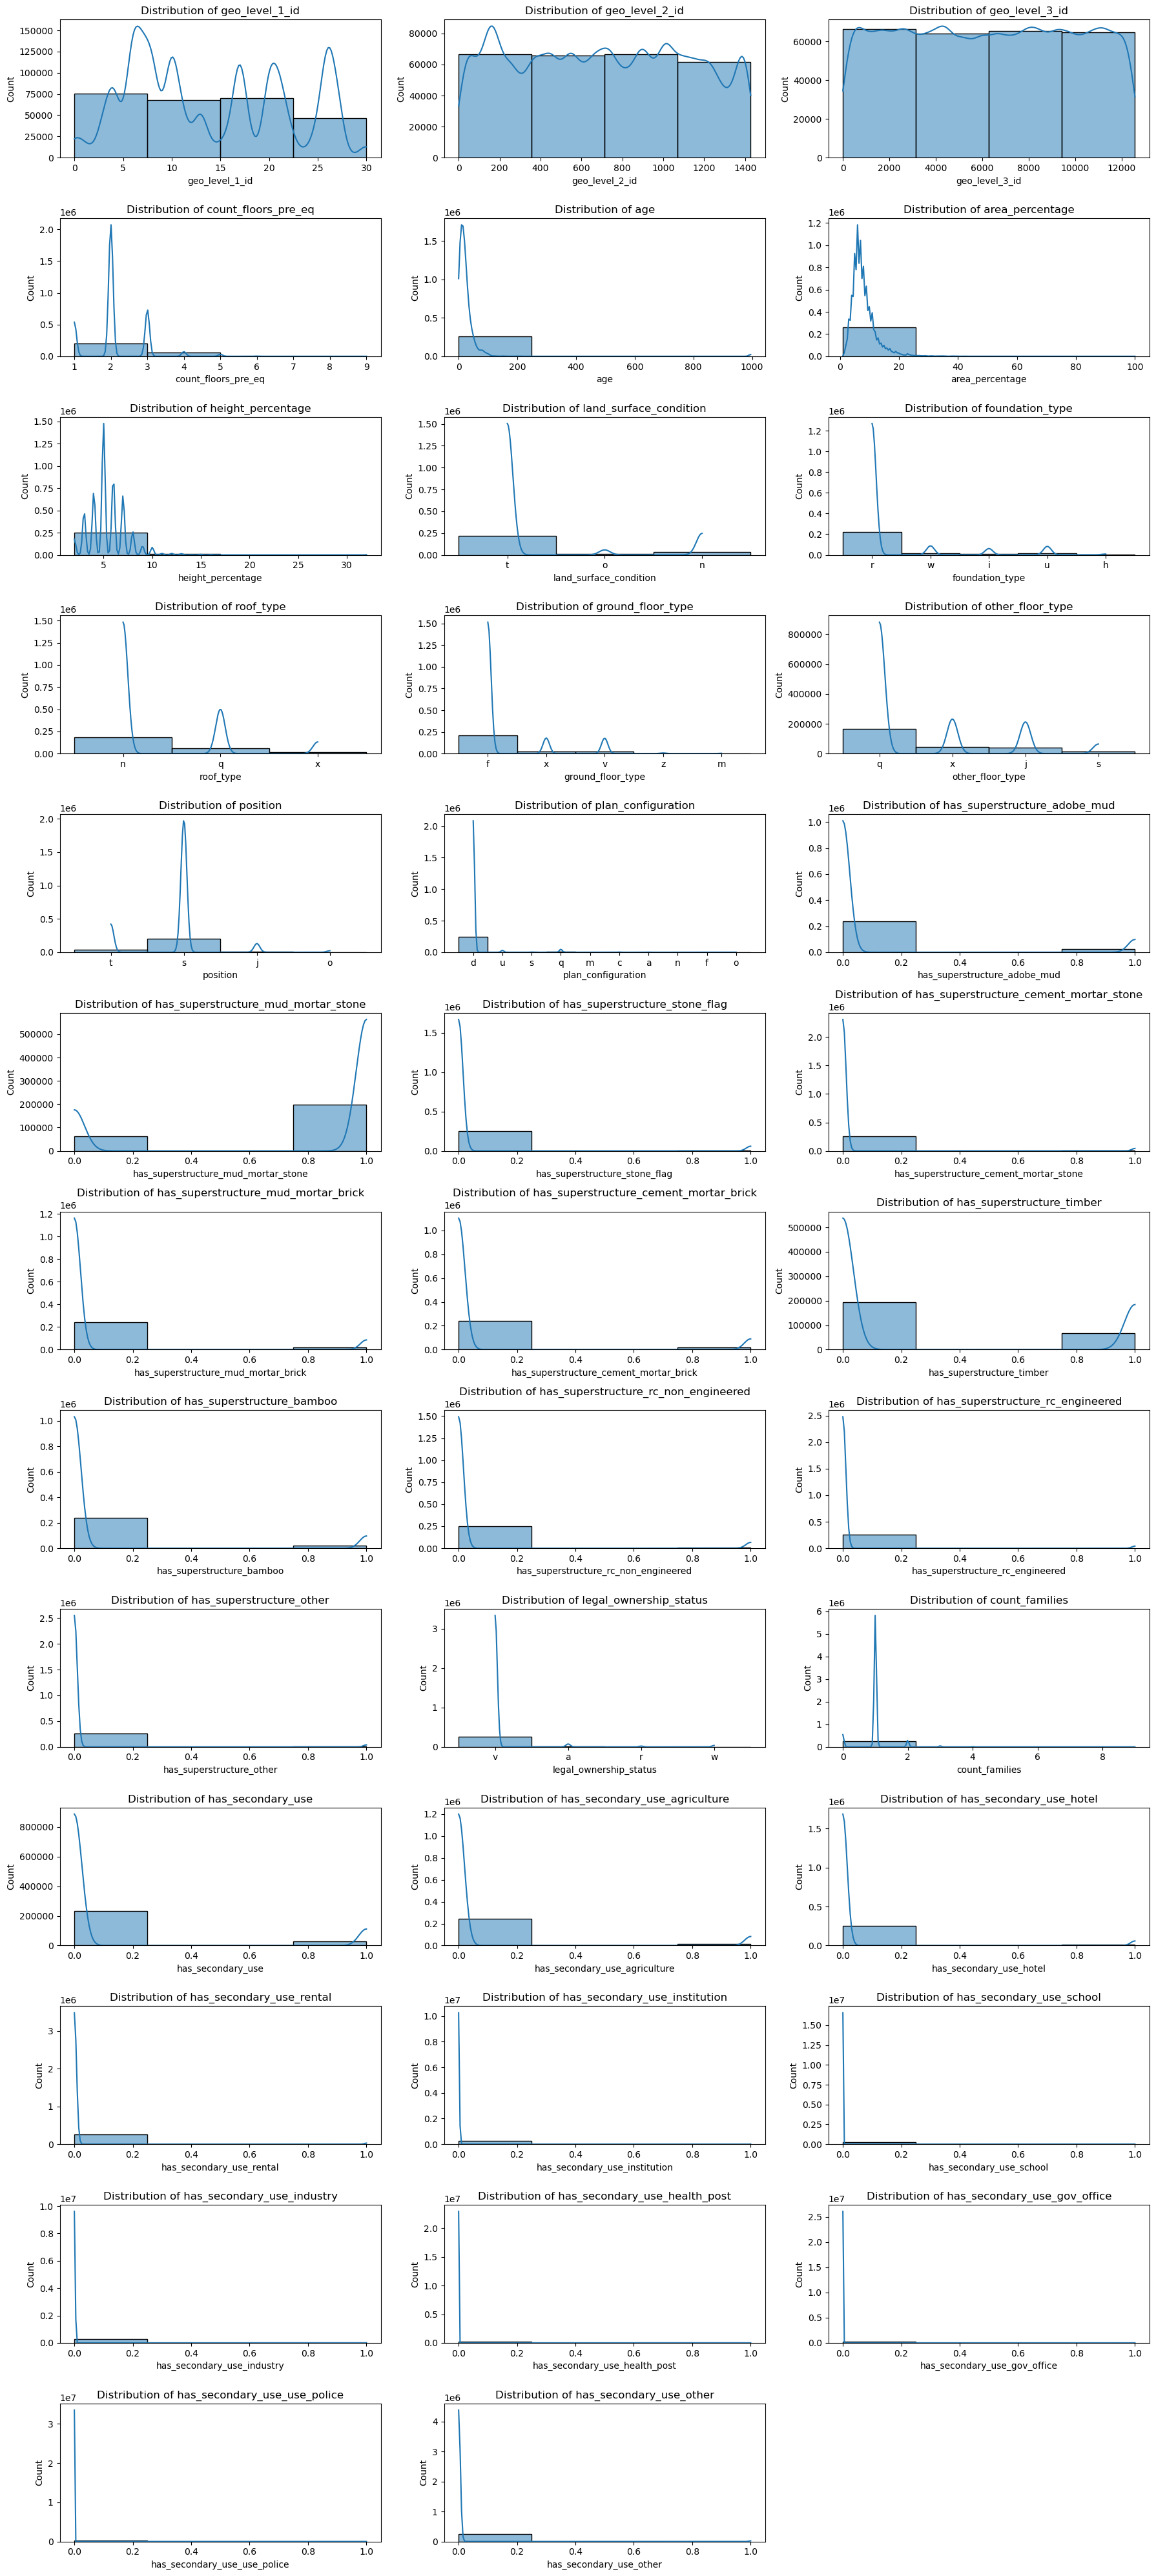

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns.drop(['damage_grade','building_id'])  # all except target

# Plot histograms for all features
plt.figure(figsize=(18, 40))
for i, col in enumerate(features, 1):
    plt.subplot(13, 3, i)
    sns.histplot(df[col], bins=4,kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()


In [4]:
#As we can see data with lot of skewness. But lot feature contains numeric categorical so I am leaving them as it is.

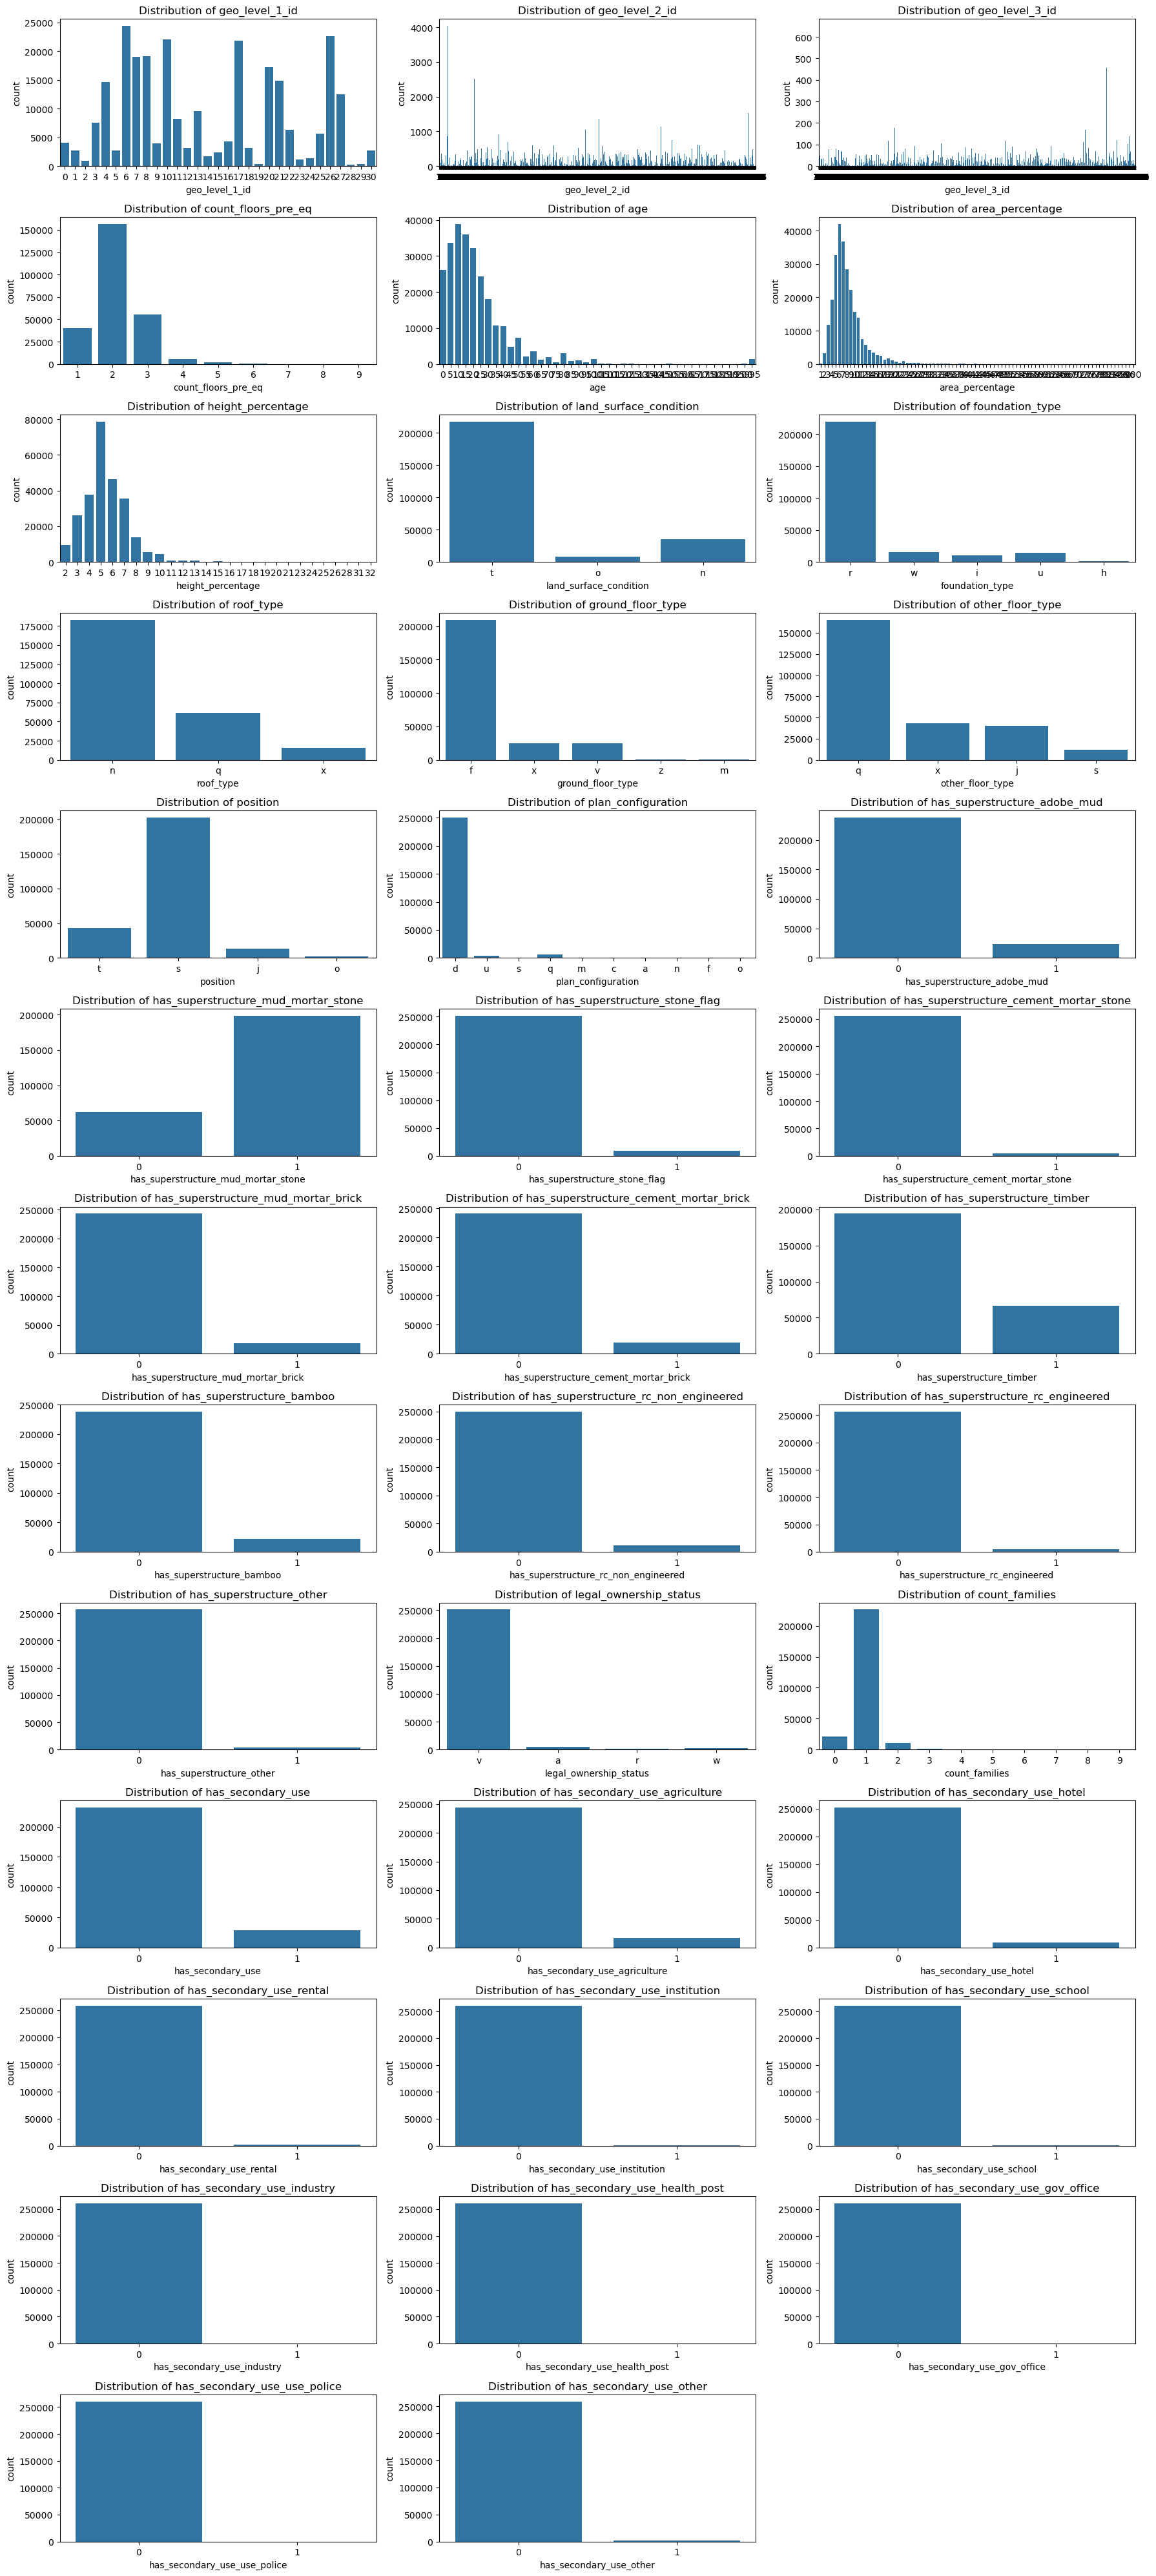

In [24]:
features = df.drop(['damage_grade','building_id'],axis=1)

# Plot histograms for all features
plt.figure(figsize=(18, 40))
for i, col in enumerate(features, 1):
    plt.subplot(13, 3, i)
    sns.countplot(df,x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

In [5]:
#Many features in the dataset don't have variance. As you can from see below visualization 

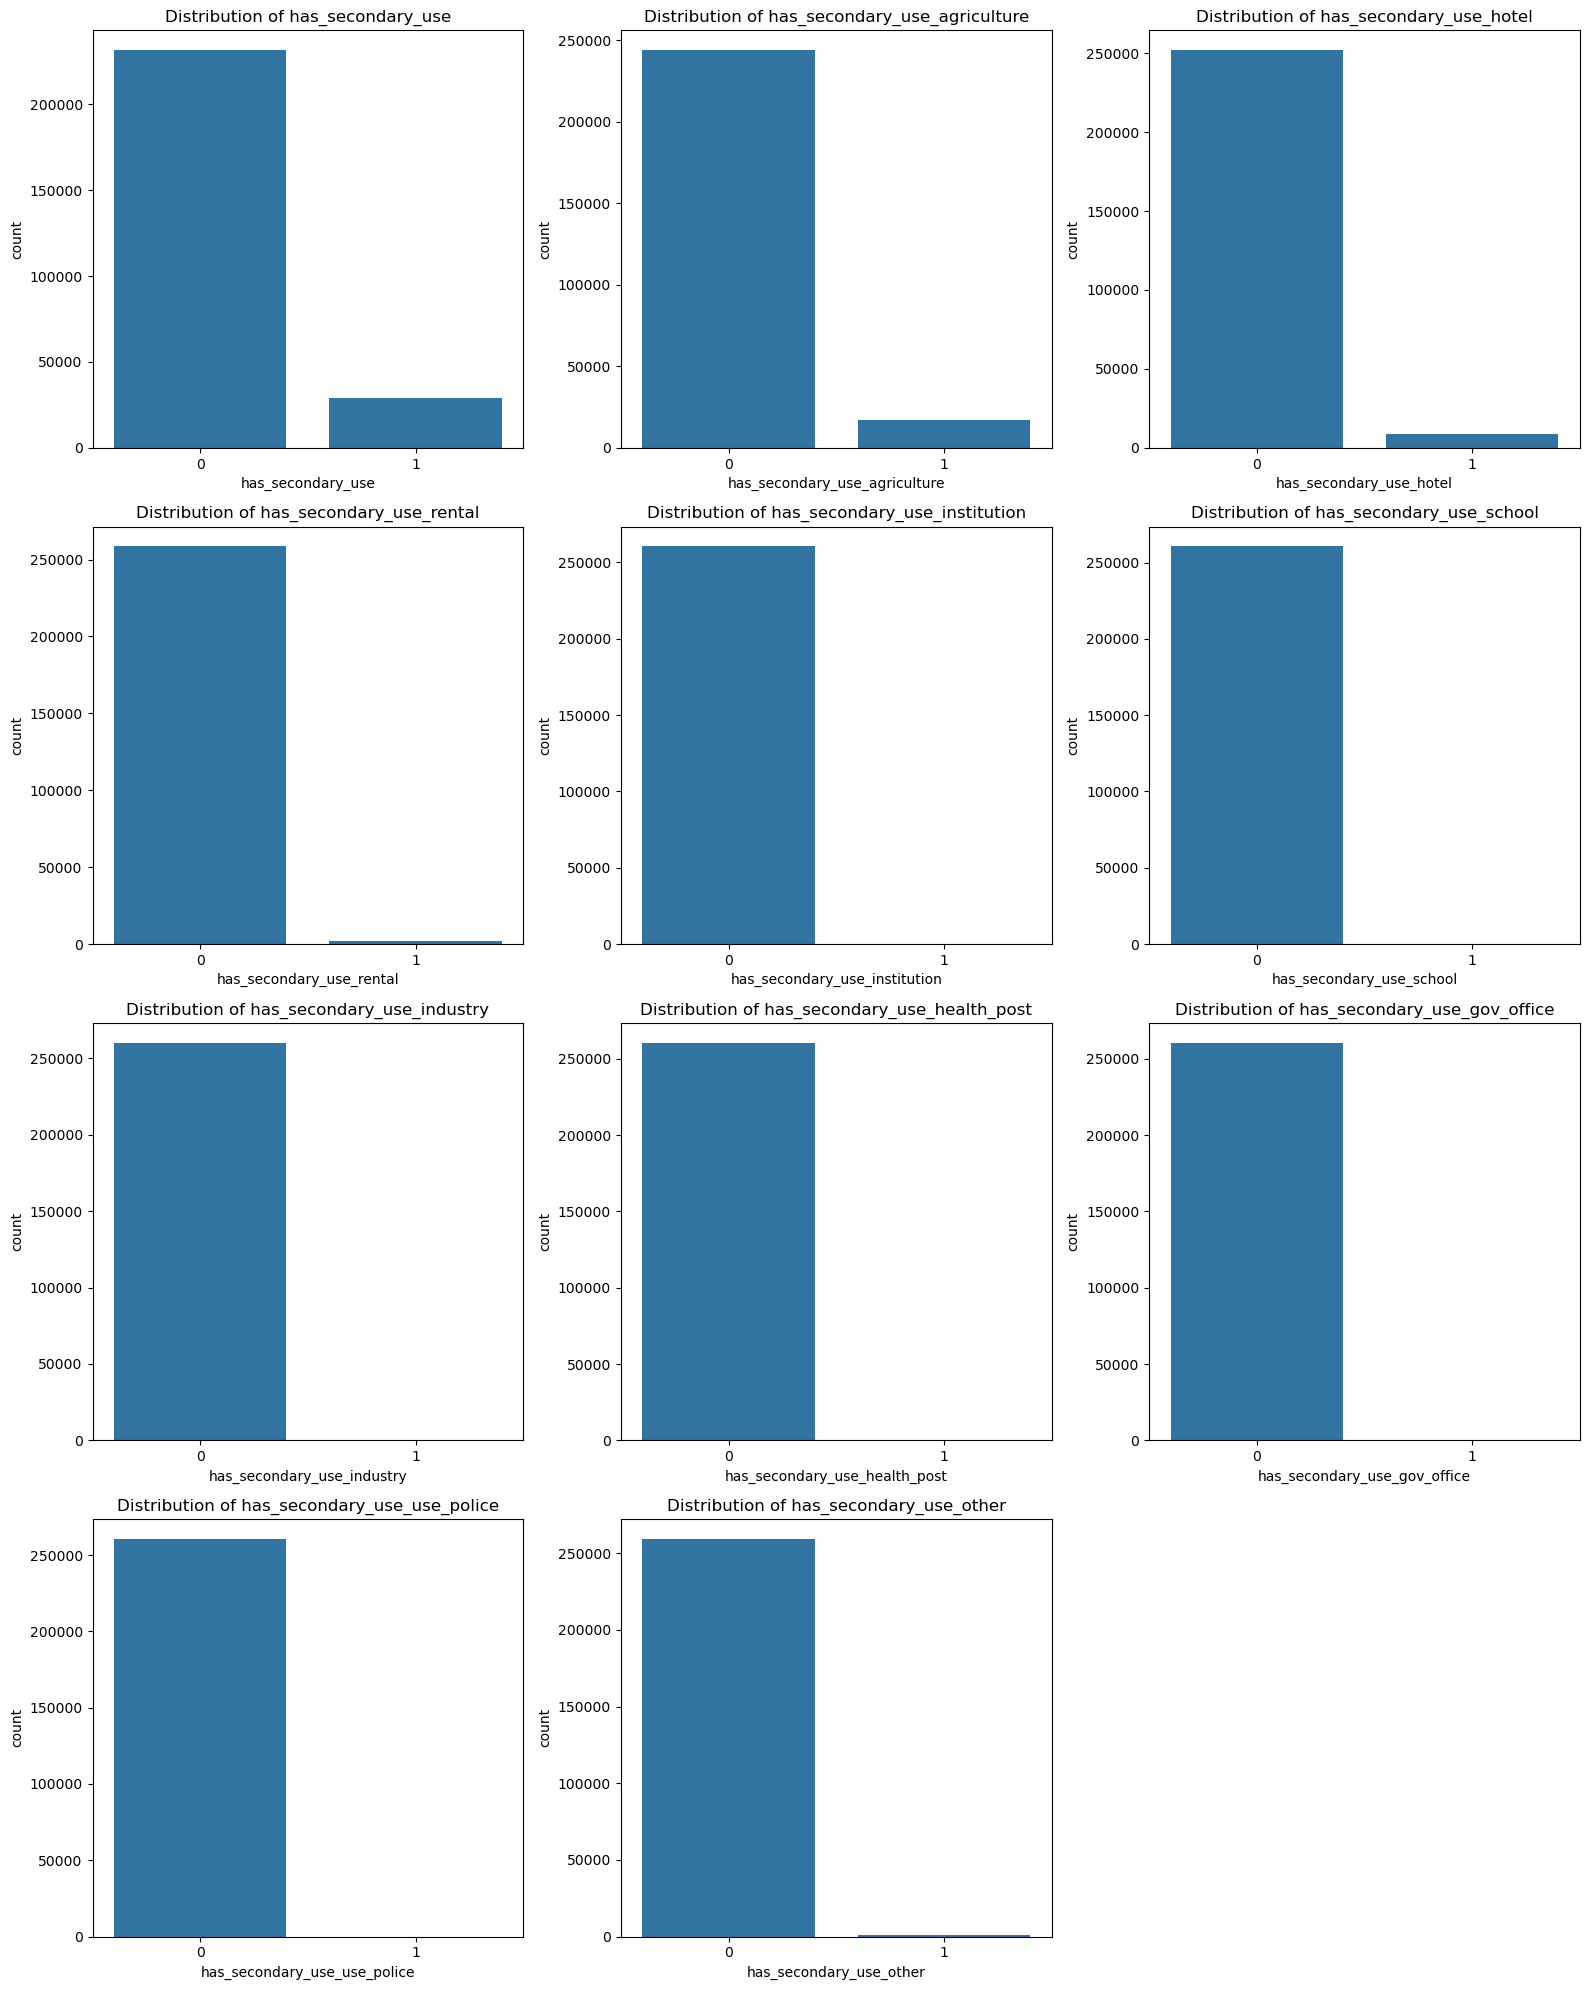

In [118]:
features = ['has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

# Plot histograms for all features
plt.figure(figsize=(16, 20))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(df,x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

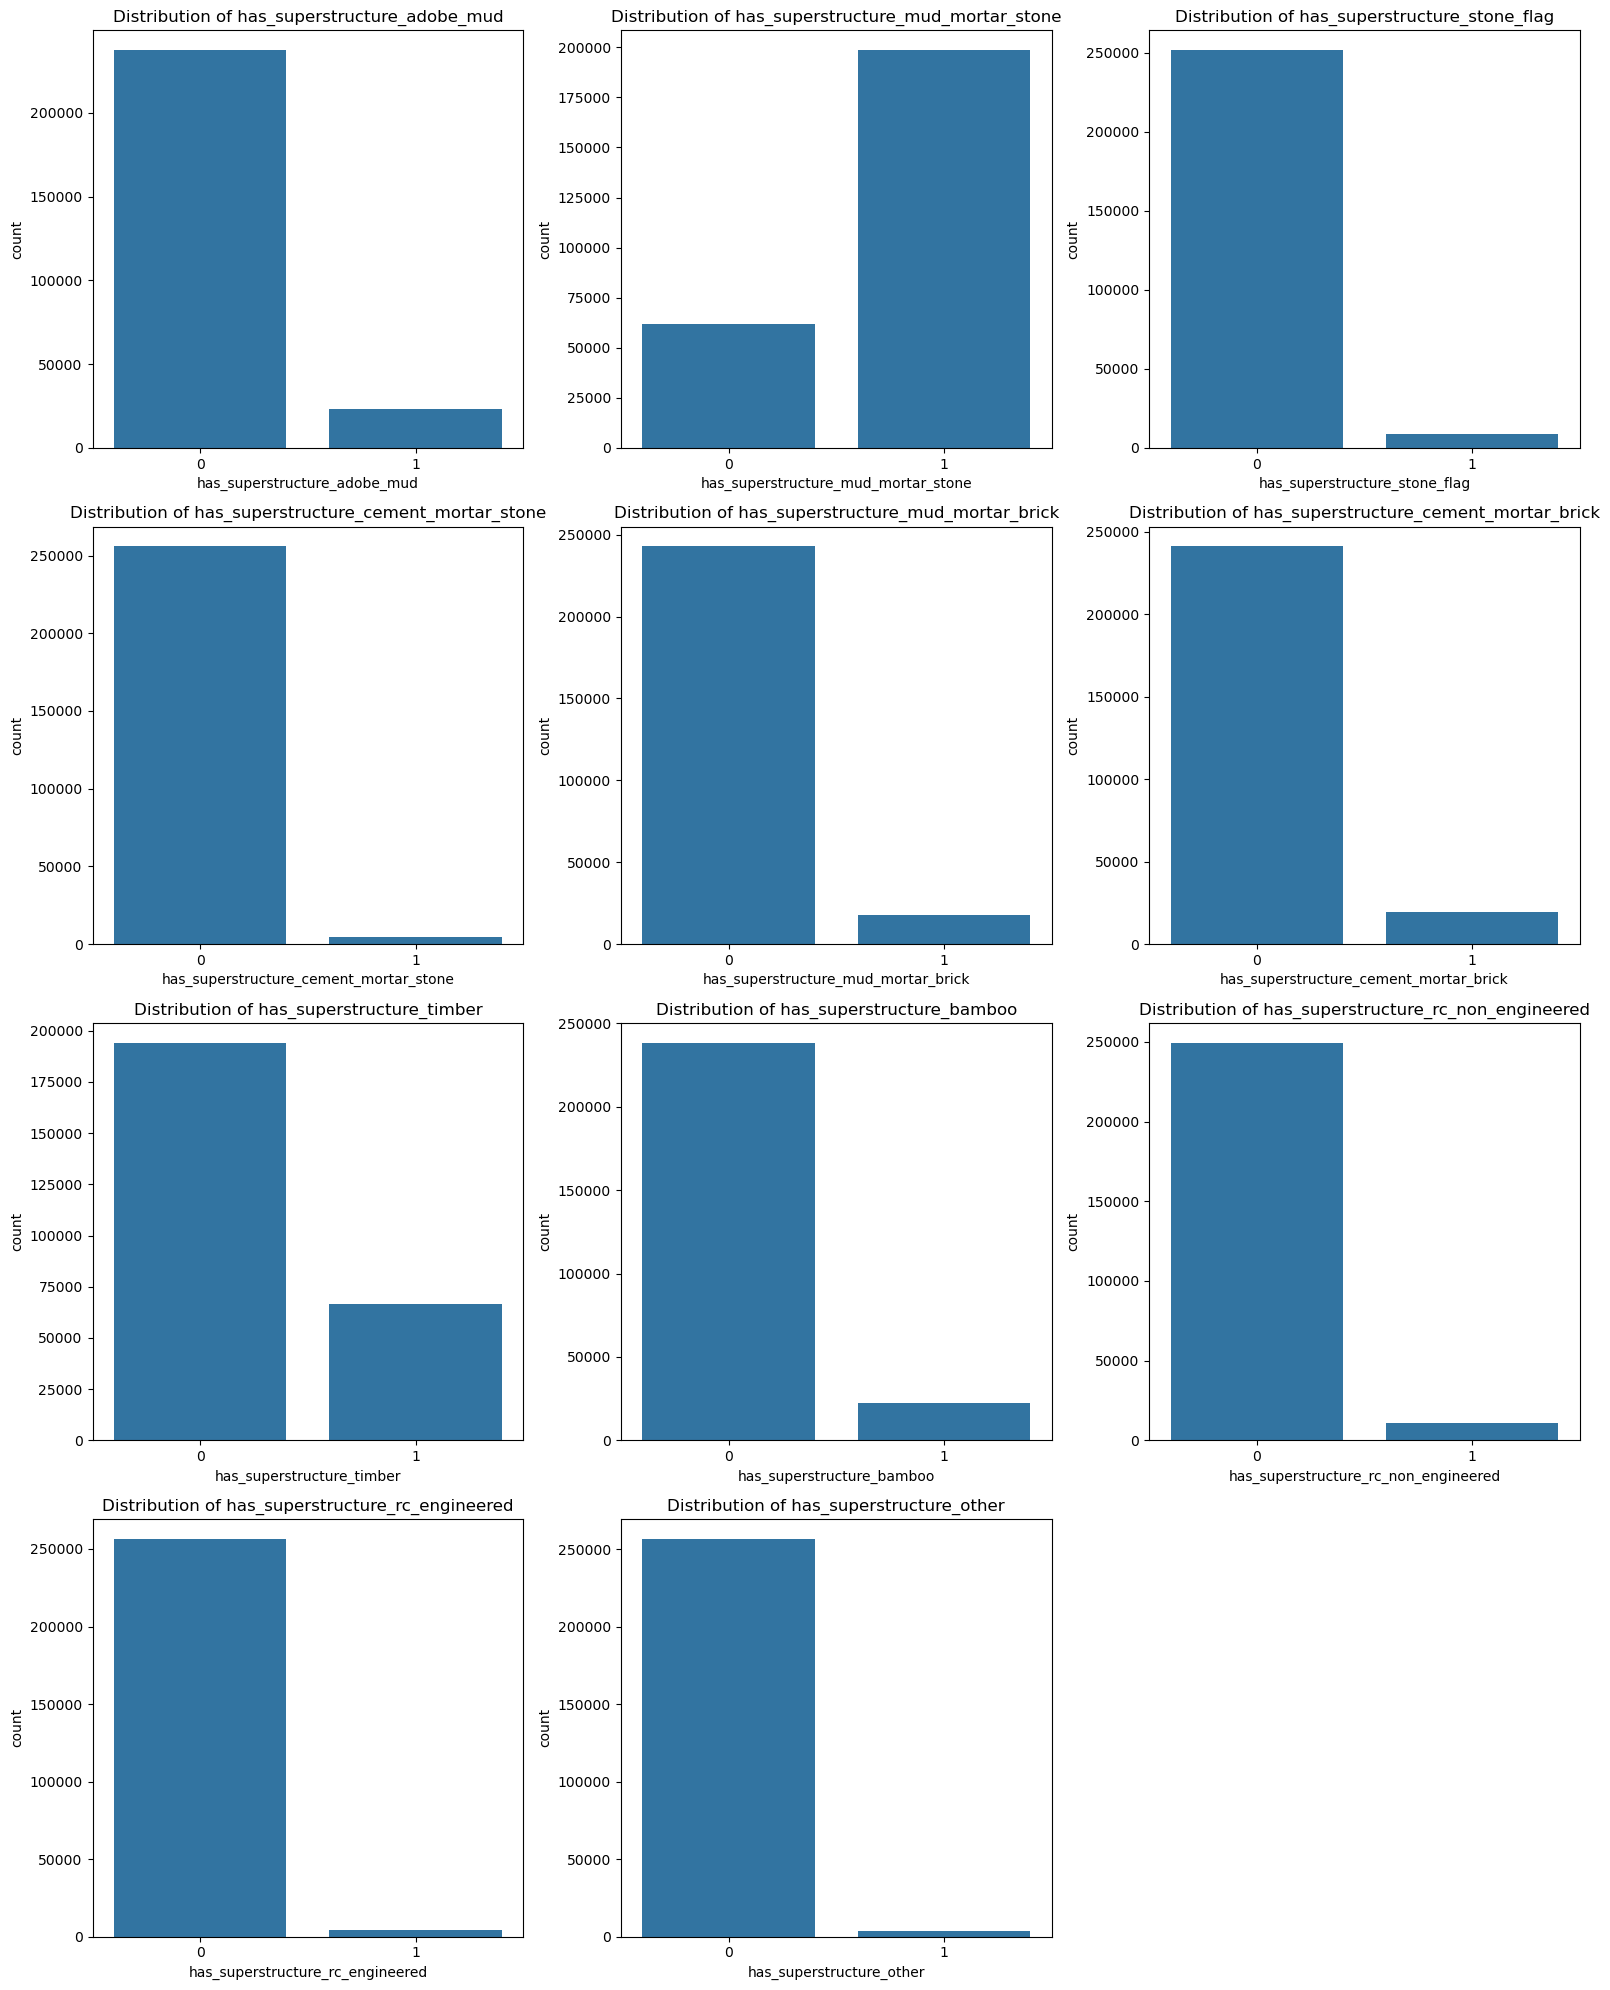

In [119]:
features = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

# Plot histograms for all features
plt.figure(figsize=(16, 20))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(df,x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

In [120]:
# As per now, I am not going to delete the columns.

In [9]:
df.skew(numeric_only=True) # many column contains lot os skewed values

building_id                                 0.001882
geo_level_1_id                              0.272530
geo_level_2_id                              0.028957
geo_level_3_id                              0.000394
count_floors_pre_eq                         0.834113
age                                        12.192494
area_percentage                             3.526082
height_percentage                           1.808262
has_superstructure_adobe_mud                2.894530
has_superstructure_mud_mortar_stone        -1.230040
has_superstructure_stone_flag               5.114983
has_superstructure_cement_mortar_stone      7.201350
has_superstructure_mud_mortar_brick         3.427233
has_superstructure_cement_mortar_brick      3.219832
has_superstructure_timber                   1.124293
has_superstructure_bamboo                   2.975932
has_superstructure_rc_non_engineered        4.530387
has_superstructure_rc_engineered            7.750517
has_superstructure_other                    7.

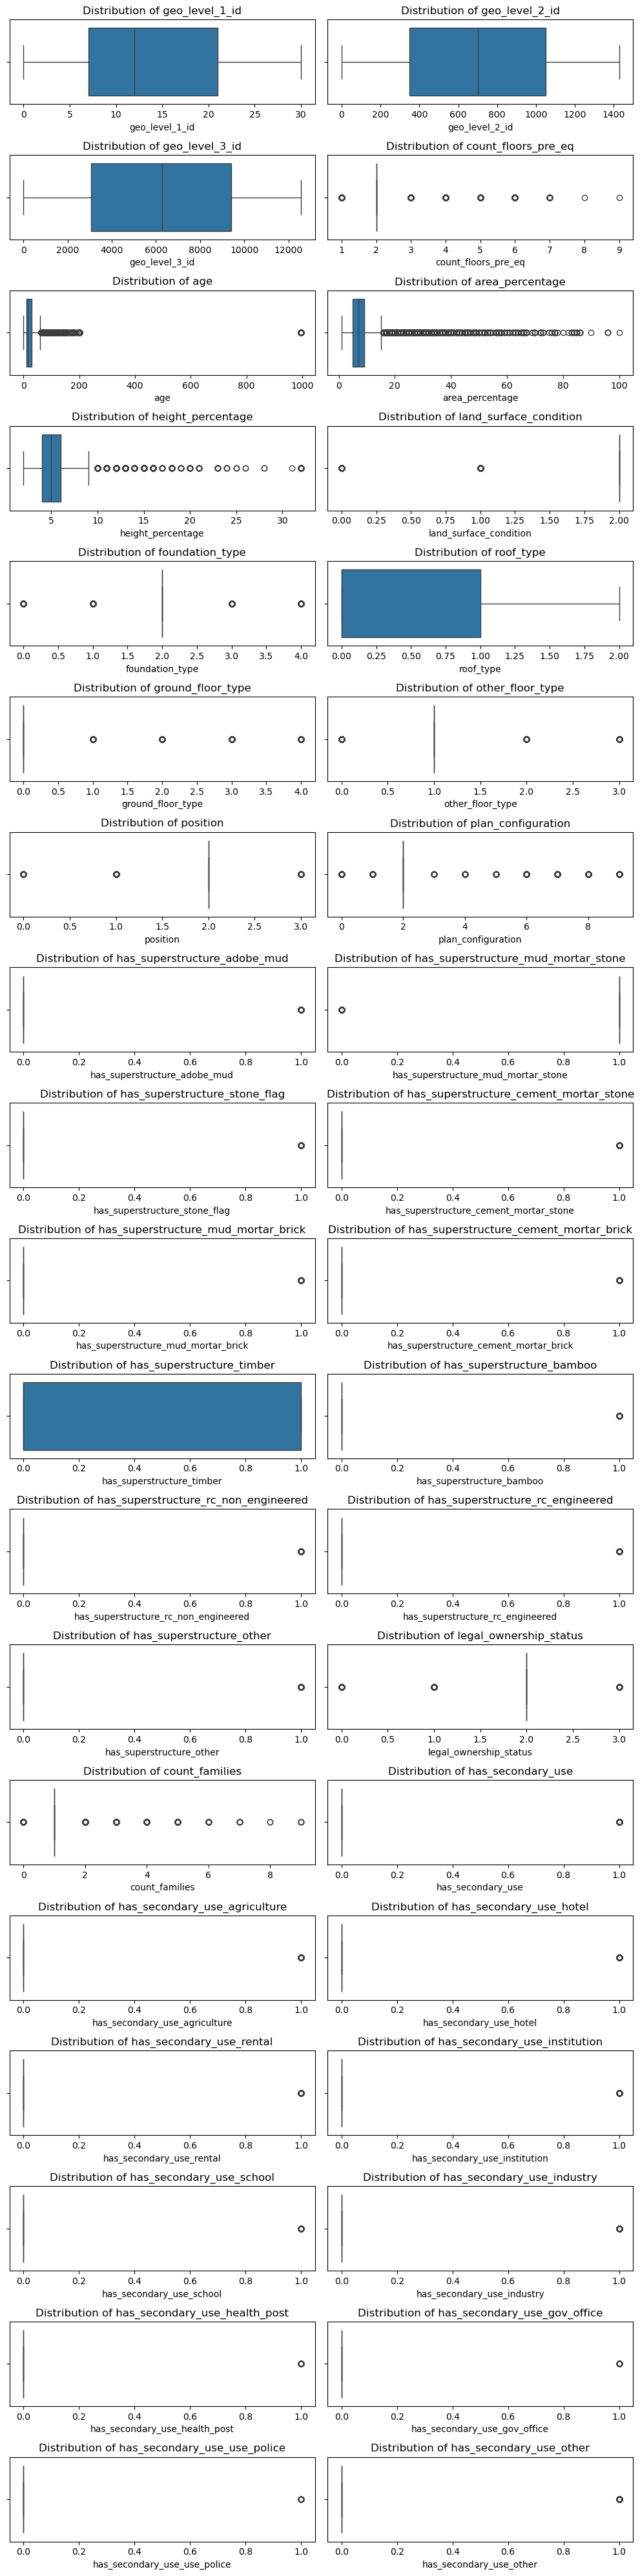

In [39]:
features = df.columns.drop(['damage_grade','building_id'])

# Plot histograms for all features
plt.figure(figsize=(10, 40))
for i, col in enumerate(features, 1):
    plt.subplot(19, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

In [8]:
# Allmost all features are numeric categorical data's. Thats why i am not dealing with the outliers.
# While dealing outliers in Age, area_percentage and height_percentage, it's making lot of new sense in correlation of features. Thats why i am not dealing with the outliers.

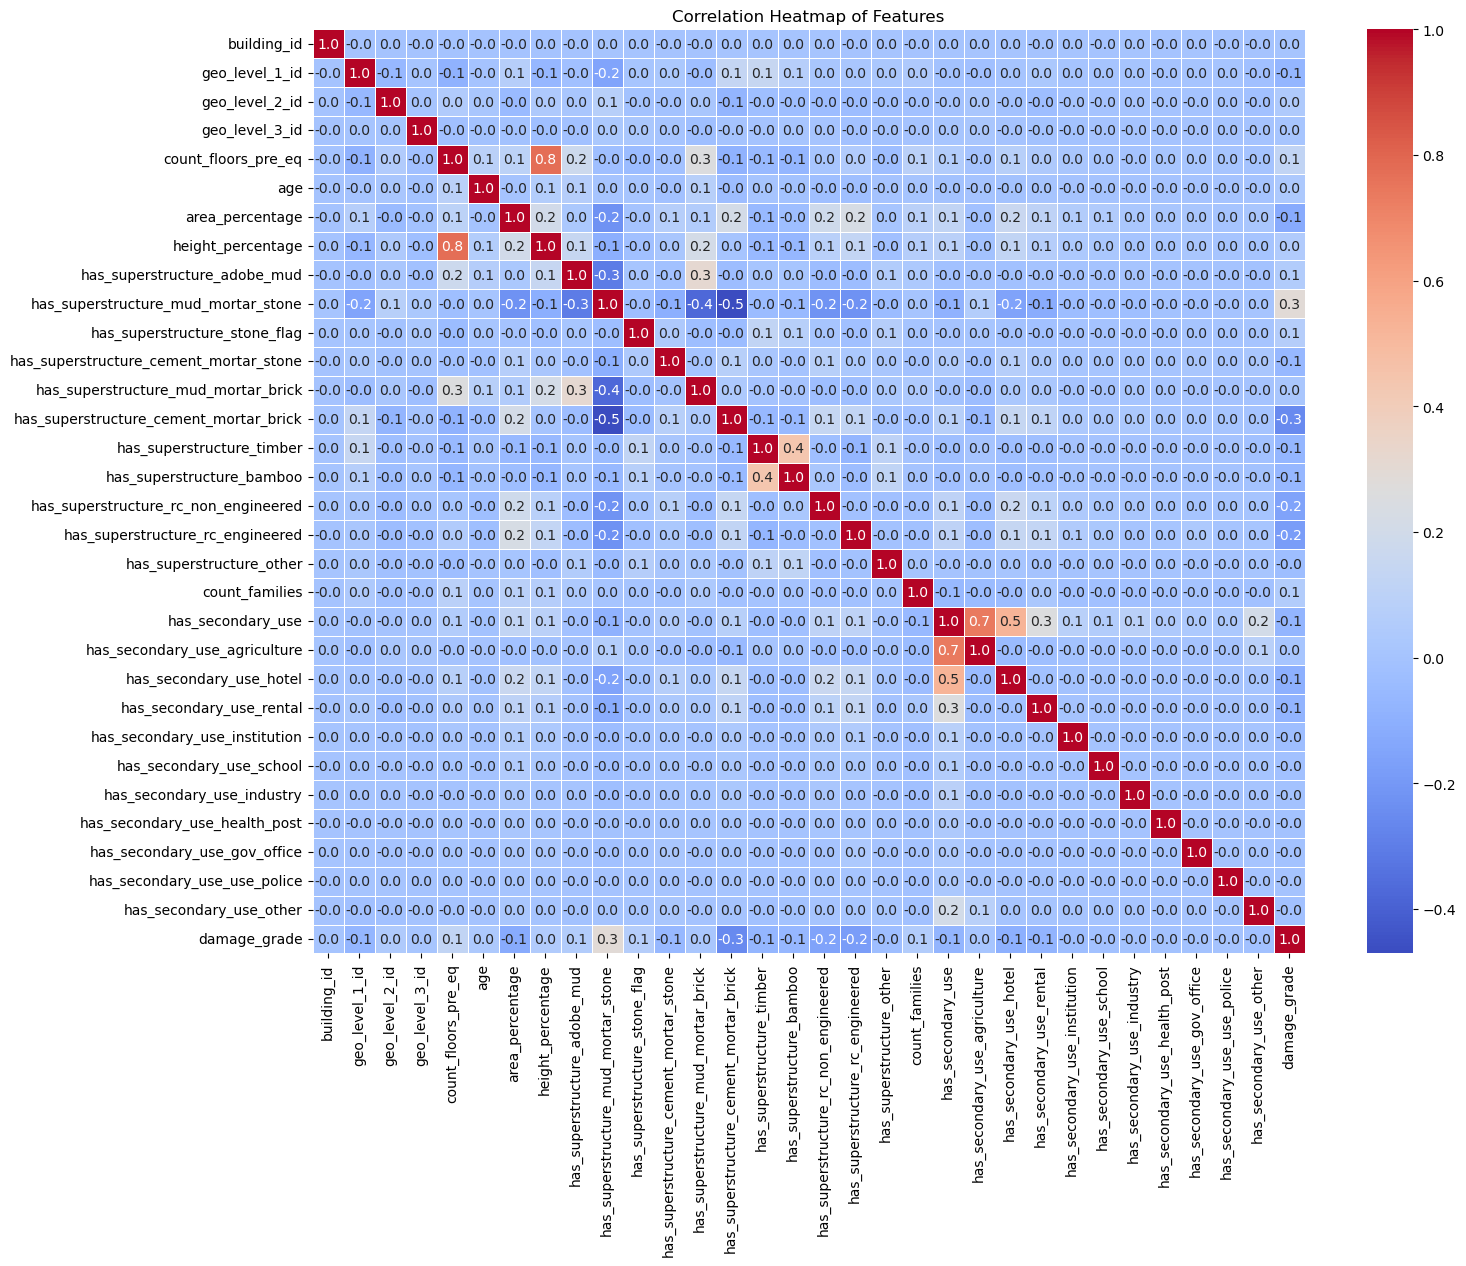

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', linewidths=0.5,annot=True,fmt=".1f")
plt.title("Correlation Heatmap of Features")
plt.show()


ENCODING

In [5]:
# Select object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", list(categorical_cols))


Categorical Columns: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder if you need to transform test data later


In [7]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2,2,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,1,2,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,2,2,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,2,2,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,2,2,...,0,0,0,0,0,0,0,0,0,3


In [11]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

SPLITTING AND SCALING

In [18]:
from sklearn.model_selection import train_test_split

# Drop ID and separate features and target
X = df.drop(['building_id','count_floors_pre_eq','has_secondary_use','damage_grade'], axis=1)
y = df['damage_grade']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [19]:
from sklearn.preprocessing import StandardScaler

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
X_train_scaled.shape

(195450, 36)

In [17]:
X_test_scaled.shape

(65151, 36)

In [18]:
X_train.shape

(195450, 36)

In [19]:
X_test.shape

(65151, 36)

In [20]:
y_test.shape

(65151,)

In [21]:
y_train.shape

(195450,)

HANDLING IMBALANCE

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE on scaled training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check class balance before and after
print("Before SMOTE:", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))


Before SMOTE: Counter({2: 111194, 3: 65413, 1: 18843})
After SMOTE:  Counter({2: 111194, 3: 111194, 1: 111194})


MODELS

LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
# Train Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train_smote, y_train_smote)

C:\Users\karti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [17]:
#Predict and evaluate
y_pred = log_reg.predict(X_test_scaled)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

In [19]:
confusion_matrix(y_test,y_pred)

array([[ 4114,   905,  1262],
       [ 5396, 12172, 19497],
       [  924,  5235, 15646]])

In [20]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred, average='macro'))
print('f1_score',f1_score(y_test, y_pred, average='macro'))
print('recall_score:',recall_score(y_test,y_pred, average='macro'))

Accuracy: 0.490122945158171
precision_score: 0.49625492575370567
f1_score 0.48980940735759515
recall_score: 0.5669763842021643


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.39      0.65      0.49      6281
           2       0.66      0.33      0.44     37065
           3       0.43      0.72      0.54     21805

    accuracy                           0.49     65151
   macro avg       0.50      0.57      0.49     65151
weighted avg       0.56      0.49      0.48     65151



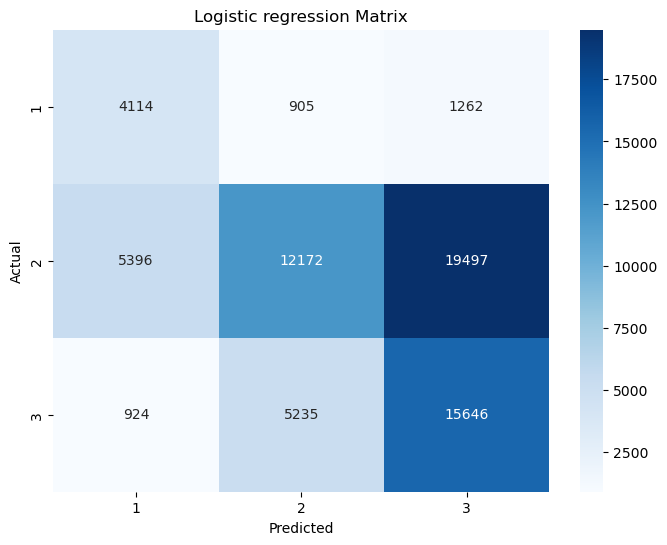

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Logistic regression Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVC

In [ ]:
from sklearn.svm import SVC

# SVM Classifier (with RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

In [ ]:
# Predict and evaluate
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))
print('recall_score:',recall_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN

In [23]:
# Import all required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)


KNeighborsClassifier()

In [25]:
y_pred = knn_model.predict(X_test_scaled)


In [26]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred, average='macro'))
print('f1_score',f1_score(y_test, y_pred, average='macro'))
print('recall_score:',recall_score(y_test,y_pred, average='macro'))

Accuracy: 0.5884790716949855
precision_score: 0.5463774933797356
f1_score 0.563184168441149
recall_score: 0.6325178583012184


In [27]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.72      0.48      6281
           2       0.72      0.53      0.61     37065
           3       0.56      0.65      0.60     21805

    accuracy                           0.59     65151
   macro avg       0.55      0.63      0.56     65151
weighted avg       0.63      0.59      0.60     65151


Confusion Matrix:
 [[ 4507  1333   441]
 [ 6688 19682 10695]
 [ 1454  6200 14151]]


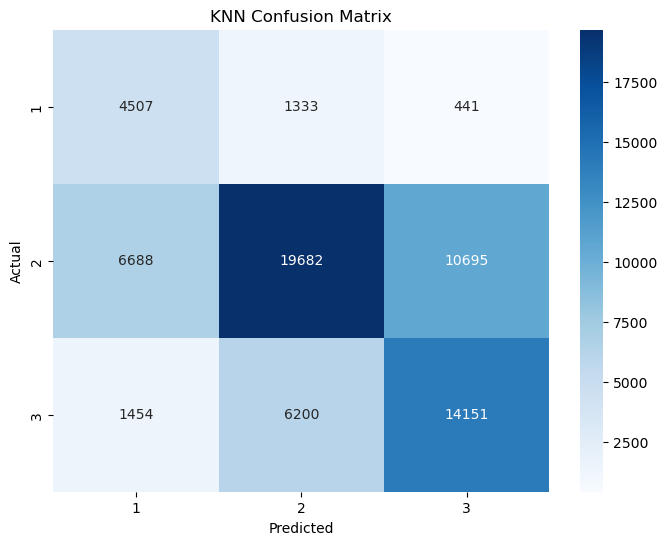

TREE BASED ALGO'S

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE

# Ensure y_train is 1D
y_train = y_train.ravel()

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Check new class distribution
print("Balanced class distribution:\n", pd.Series(y_train_balanced).value_counts())


C:\Users\karti\AppData\Local\Temp\ipykernel_11140\1675489503.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


Balanced class distribution:
 3    118607
2    118607
1    118607
Name: count, dtype: int64


DECISION TREE

In [31]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [32]:
tree_model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
tree_model.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [33]:
y_pred = tree_model.predict(X_test)


In [34]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred, average='macro'))
print('f1_score',f1_score(y_test, y_pred, average='macro'))
print('recall_score:',recall_score(y_test,y_pred, average='macro'))

Accuracy: 0.6483375223038699
precision_score: 0.5911374102410635
f1_score 0.6032719956847297
recall_score: 0.6201157977335842


In [35]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Classification Report:
               precision    recall  f1-score   support

           1       0.44      0.55      0.49      5025
           2       0.72      0.67      0.70     29652
           3       0.61      0.63      0.62     17444

    accuracy                           0.65     52121
   macro avg       0.59      0.62      0.60     52121
weighted avg       0.66      0.65      0.65     52121


 Confusion Matrix:
 [[ 2784  1891   350]
 [ 2996 19967  6689]
 [  496  5907 11041]]


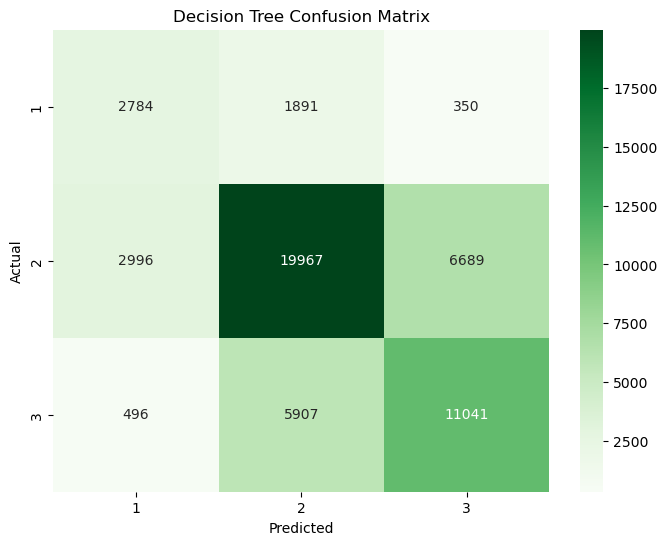

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(n_estimators=300, random_state=42)

In [39]:
y_pred = rf_model.predict(X_test)

In [41]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred, average='macro'))
print('f1_score',f1_score(y_test, y_pred, average='macro'))
print('recall_score:',recall_score(y_test,y_pred, average='macro'))

Accuracy: 0.7070086913144414
precision_score: 0.662596486935959
f1_score 0.6683232437768778
recall_score: 0.6751664756447088


In [42]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.61      0.58      5025
           2       0.75      0.75      0.75     29652
           3       0.68      0.66      0.67     17444

    accuracy                           0.71     52121
   macro avg       0.66      0.68      0.67     52121
weighted avg       0.71      0.71      0.71     52121


 Confusion Matrix:
 [[ 3086  1821   118]
 [ 2233 22210  5209]
 [  241  5649 11554]]


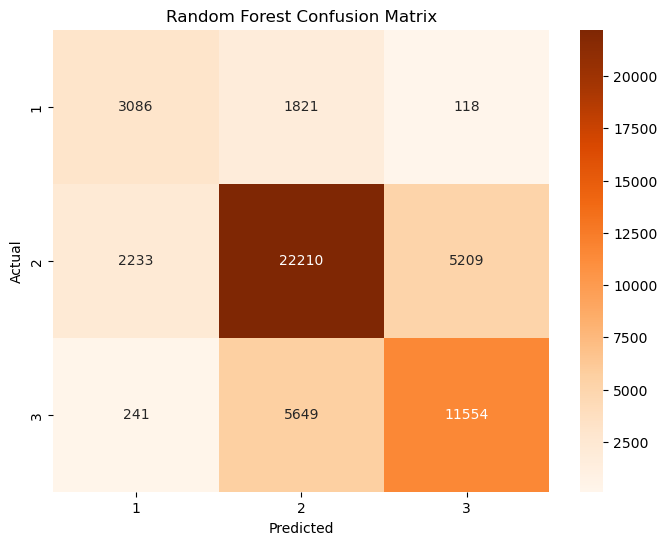

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\karti\AppData\Local\Temp\ipykernel_26372\3055773292.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


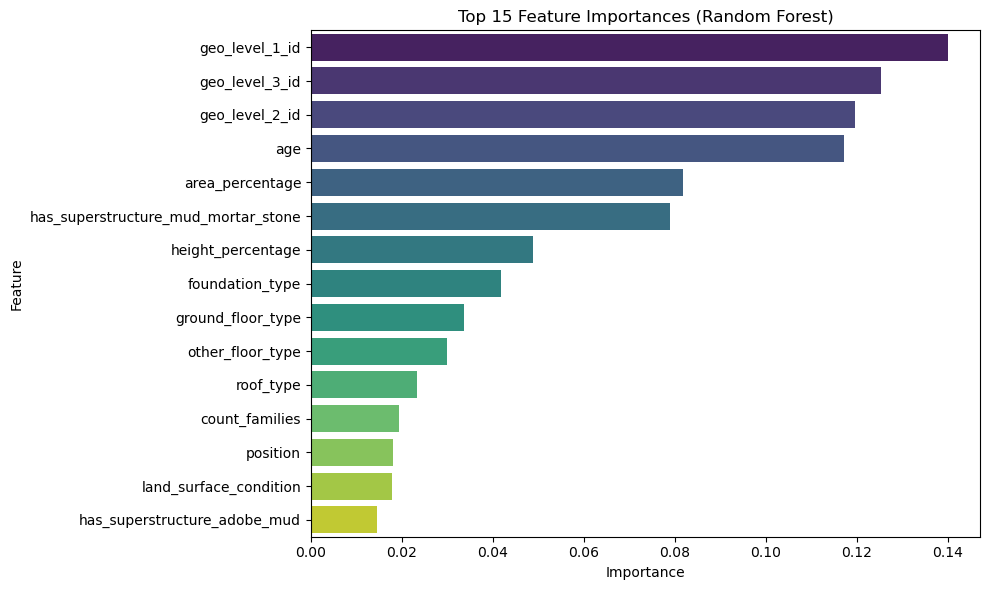

In [44]:
import numpy as np

importances = rf_model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


NAIVE BAYES

In [183]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [184]:
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)


GaussianNB()

In [187]:
y_pred = nb_model.predict(X_test)

In [188]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred, average='macro'))
print('f1_score',f1_score(y_test, y_pred, average='macro'))
print('recall_score:',recall_score(y_test,y_pred, average='macro'))

Accuracy: 0.4173365821837647
precision_score: 0.468387237502947
f1_score 0.40354028843000106
recall_score: 0.5376300515951309


In [110]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.64      0.46      5025
           2       0.65      0.13      0.21     29652
           3       0.40      0.84      0.54     17444

    accuracy                           0.42     52121
   macro avg       0.47      0.54      0.40     52121
weighted avg       0.54      0.42      0.35     52121


 Confusion Matrix:
 [[ 3218   365  1442]
 [ 4757  3813 21082]
 [ 1073  1650 14721]]


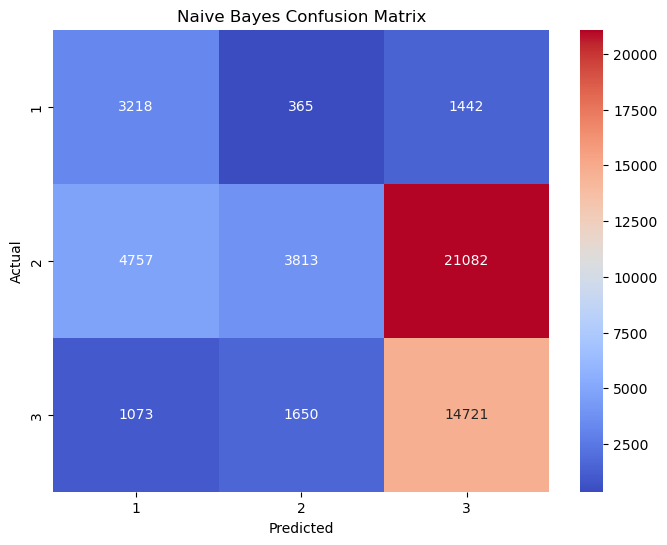

In [111]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBOOST

In [9]:
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

In [10]:
# Encode labels to start from 0 if needed
le = LabelEncoder()
df['damage_grade_encoded'] = le.fit_transform(df['damage_grade'])

X = df.drop(['building_id', 'damage_grade','damage_grade_encoded'], axis=1)
y = df['damage_grade_encoded']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42)


In [12]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print("Balanced class distribution:\n", pd.Series(y_train_balanced).value_counts())


Balanced class distribution:
 damage_grade_encoded
2    118607
1    118607
0    118607
Name: count, dtype: int64


In [49]:
model = XGBClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

importances = model.feature_importances_
top_features = np.argsort(importances)[::-1][:20]  # Top 20

top_feature_names = X_train_balanced.columns[top_features]
X_train_top = X_train_balanced[top_feature_names]
X_test_top = X_test[top_feature_names]  # Ensure X_test has the same columns

final_model = XGBClassifier(random_state=42)
final_model.fit(X_train_top, y_train_balanced)

y_pred = final_model.predict(X_test_top)

In [50]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test, y_pred, average='macro'))
print('f1_score',f1_score(y_test, y_pred, average='macro'))
print('recall_score:',recall_score(y_test,y_pred, average='macro'))

Accuracy: 0.701847623798469
precision_score: 0.6516845178288307
f1_score 0.6650108950967277
recall_score: 0.6830185044686701


In [51]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.701847623798469

 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.64      0.58      5025
           1       0.75      0.72      0.74     29652
           2       0.68      0.68      0.68     17444

    accuracy                           0.70     52121
   macro avg       0.65      0.68      0.67     52121
weighted avg       0.71      0.70      0.70     52121



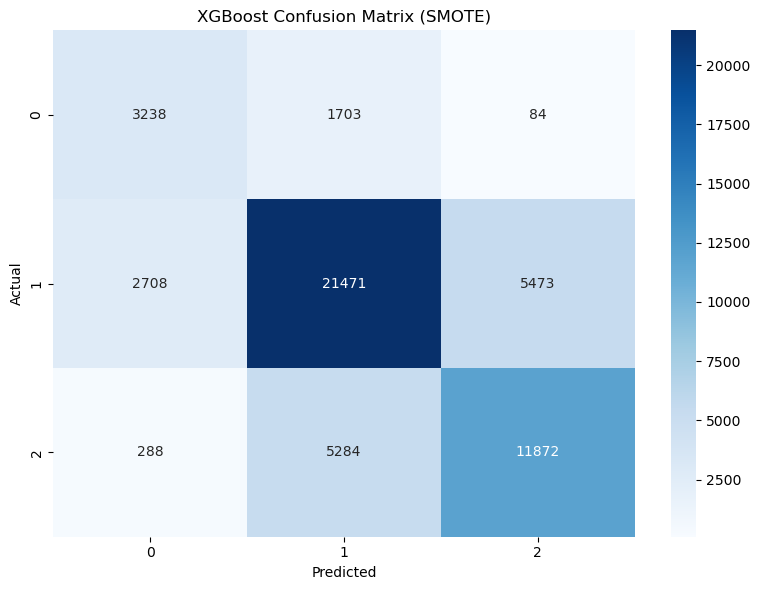

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("XGBoost Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

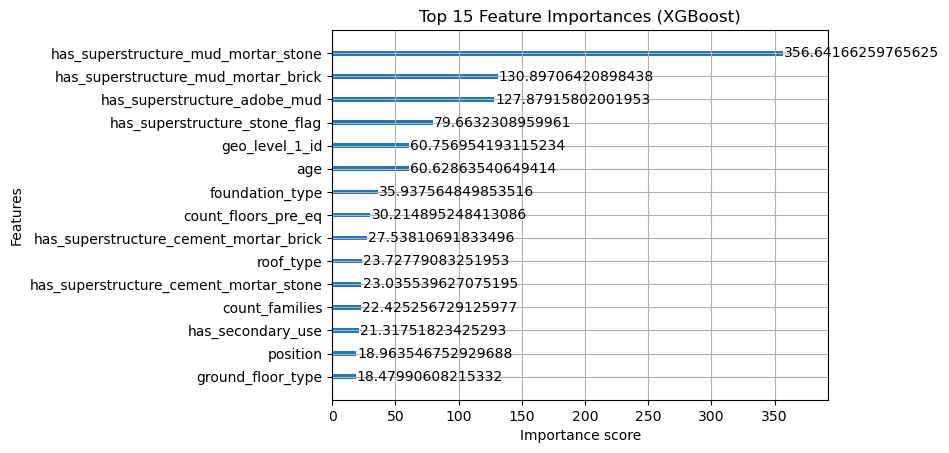

In [54]:
plt.figure(figsize=(10, 6))
plot_importance(final_model, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()


HYPERPARAMETER TUNING On XGBoost(RandomizedSearchCV)

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 12),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Initialize model
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,  # number of random combos to try
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit
random_search.fit(X_train_balanced, y_train_balanced)

# Results
print(" Best Parameters:", random_search.best_params_)
print(" Best F1 Macro Score:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\karti\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Parameters: {'colsample_bytree': np.float64(0.8123620356542087), 'learning_rate': np.float64(0.20014286128198325), 'max_depth': 10, 'n_estimators': 288, 'subsample': np.float64(0.879055047383946)}
 Best F1 Macro Score: 0.8108360525479089


In [14]:
# Evaluate on test set
y_pred = best_xgb_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(" Test Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Test Accuracy: 0.7385698662727116
 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      5025
           1       0.77      0.79      0.78     29652
           2       0.73      0.68      0.70     17444

    accuracy                           0.74     52121
   macro avg       0.70      0.70      0.70     52121
weighted avg       0.74      0.74      0.74     52121



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low (0)', 'Medium (1)', 'Severe (2)'],
            yticklabels=['Low (0)', 'Medium (1)', 'Severe (2)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


LightGBM

In [214]:
from lightgbm import LGBMClassifier
import numpy as np

model = LGBMClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 333582, number of used features: 36
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


LGBMClassifier(random_state=42)

In [55]:
from lightgbm import LGBMClassifier
import numpy as np

In [56]:
lgb_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    random_state=42,
    class_weight='balanced'
)
lgb_model.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.159850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 333582, number of used features: 36
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


LGBMClassifier(class_weight='balanced', num_class=3, objective='multiclass',
               random_state=42)

In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report)
# Metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f" Accuracy: {acc:.4f}")
print(f" Precision (macro): {precision:.4f}")
print(f" Recall (macro): {recall:.4f}")
print(f" F1 Score (macro): {f1:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.7049
 Precision (macro): 0.6569
 Recall (macro): 0.6835
 F1 Score (macro): 0.6685

 Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.64      0.58      5025
           1       0.75      0.73      0.74     29652
           2       0.68      0.68      0.68     17444

    accuracy                           0.70     52121
   macro avg       0.66      0.68      0.67     52121
weighted avg       0.71      0.70      0.71     52121



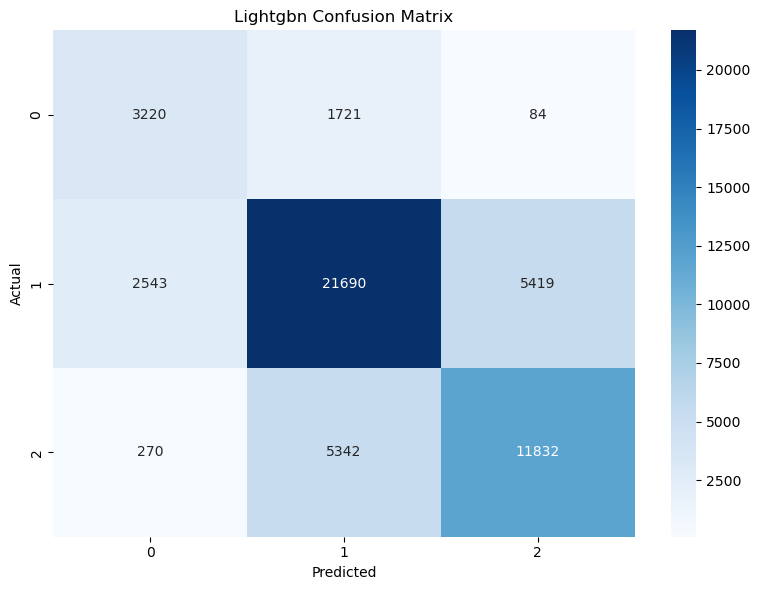

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Lightgbn Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


CATBOOST

In [34]:
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report)

In [33]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/0e/91/e60d80ce72e5fce94fa672908b1f7ffb881701027130b7d637bb6b6561a4/catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/102.5 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.2/102.5 MB 1.9 MB/s eta 0:00:55
   ---------------------------------------- 0.4/102.5 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.7/102.5 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.9/102.5 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.2/102.5 MB

In [35]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)

cat_model.fit(X_train_smote, y_train_smote)

0:	learn: 1.0528390	total: 517ms	remaining: 4m 17s
100:	learn: 0.6095123	total: 20.1s	remaining: 1m 19s
200:	learn: 0.5490138	total: 38s	remaining: 56.5s
300:	learn: 0.5189357	total: 54.2s	remaining: 35.8s
400:	learn: 0.5013694	total: 1m 11s	remaining: 17.6s
499:	learn: 0.4886998	total: 1m 27s	remaining: 0us


In [36]:
y_pred = cat_model.predict(X_test)

In [37]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f" Accuracy: {acc:.4f}")
print(f" Precision (macro): {precision:.4f}")
print(f" Recall (macro): {recall:.4f}")
print(f" F1 Score (macro): {f1:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.4846
 Precision (macro): 0.4208
 Recall (macro): 0.4081
 F1 Score (macro): 0.4125

 Classification Report:
               precision    recall  f1-score   support

           1       0.37      0.31      0.34      6281
           2       0.57      0.64      0.60     37065
           3       0.32      0.27      0.29     21805

    accuracy                           0.48     65151
   macro avg       0.42      0.41      0.41     65151
weighted avg       0.47      0.48      0.48     65151



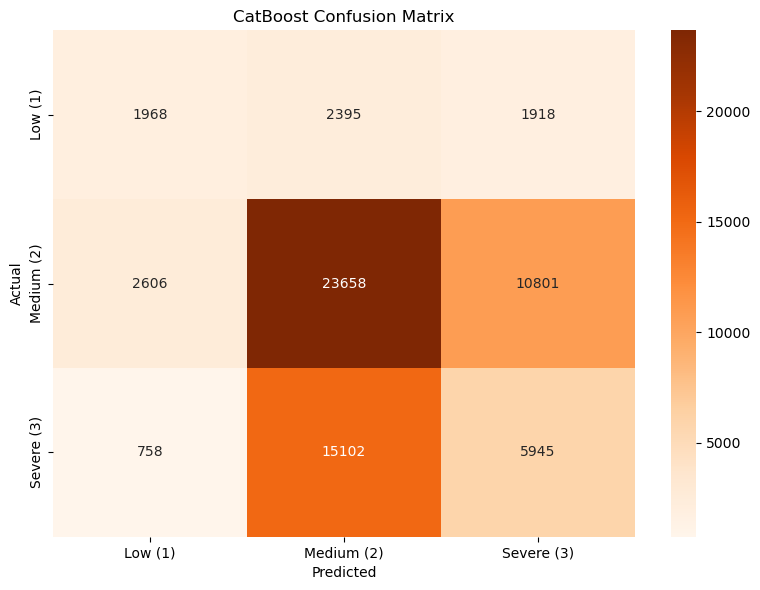

In [38]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Low (1)', 'Medium (2)', 'Severe (3)']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels)
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

CONCLUSION 

The XGBoost model, trained with SMOTE-balanced data and hyperparameter tuning, achieved a test accuracy of 73.86% and a macro F1-score of 0.70 on the earthquake building damage prediction task. Class-wise performance was strong for both medium damage (grade 1) and severe damage (grade 2), with F1-scores of 0.78 and 0.70 respectively. The model's relatively lower performance on low damage (grade 0) (F1-score of 0.62) can be attributed to class imbalance and less feature distinction in that category. Despite this, the model demonstrates solid generalization across all classes, reflecting the effectiveness of XGBoost’s gradient-boosting approach on structured, tabular data.

XGBoost's robust handling of feature interactions, its ability to mitigate overfitting through regularization, and its compatibility with imbalanced datasets make it a highly effective algorithm for this multiclass classification task. The model performed particularly well after feature engineering and resampling, with balanced precision and recall scores across categories. Future improvements can involve stacking with other tree-based models (like CatBoost or LightGBM), refining the input features using feature importance, or integrating spatial/geological features if available. Nonetheless, the current XGBoost setup delivers reliable, interpretable predictions that are well-suited for real-world deployment in post-earthquake damage assessment systems.